### Obisity Prediction

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

#  Mount Google Drive
drive.mount('/content/drive')
#  Set the path to your CSV file
file_path = '/content/drive/MyDrive/Obesity prediction_1.csv'

#  Read the CSV file
df = pd.read_csv(file_path)

#  Basic checks
print(" Dataset Loaded Successfully!\n")
print("Shape:", df.shape)#how many rows,colums
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Mounted at /content/drive
 Dataset Loaded Successfully!

Shape: (2111, 17)
+---+--------+------+--------+--------+----------------+------+------+-----+-----------+-------+------+-----+-----+-----+------------+-----------------------+---------------------+
|   | Gender | Age  | Height | Weight | family_history | FAVC | FCVC | NCP |   CAEC    | SMOKE | CH2O | SCC | FAF | TUE |    CALC    |        MTRANS         |       Obesity       |
+---+--------+------+--------+--------+----------------+------+------+-----+-----------+-------+------+-----+-----+-----+------------+-----------------------+---------------------+
| 0 | Female | 21.0 |  1.62  |  64.0  |      yes       |  no  | 2.0  | 3.0 | Sometimes |  no   | 2.0  | no  | 0.0 | 1.0 |     no     | Public_Transportation |    Normal_Weight    |
| 1 | Female | 21.0 |  1.52  |  56.0  |      yes       |  no  | 3.0  | 3.0 | Sometimes |  yes  | 3.0  | yes | 3.0 | 0.0 | Sometimes  | Public_Transportation |    Normal_Weight    |
| 2 |  Male  | 23.0 

In [2]:
#  Basic info about dataset
print("\n Dataset Info:")
df.info()

#  Summary statistics for numerical columns
print("\n Summary Statistics (Numerical Features):")
print(df.describe())

#  Summary for categorical columns
print("\n Summary Statistics (Categorical Features):")
print(df.describe(include=['object']))

#  Check for missing/null values
print("\n Missing Values per Column:")
print(df.isnull().sum())

#  Display only columns with missing values (if any)
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
if len(missing_cols) > 0:
    print("\n Columns with Missing Values:",missing_cols)
else:
    print("\n No Missing Values Found in the Dataset.")


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), ob

Columns containing zero values:

TUE    557
FAF    411
dtype: int64


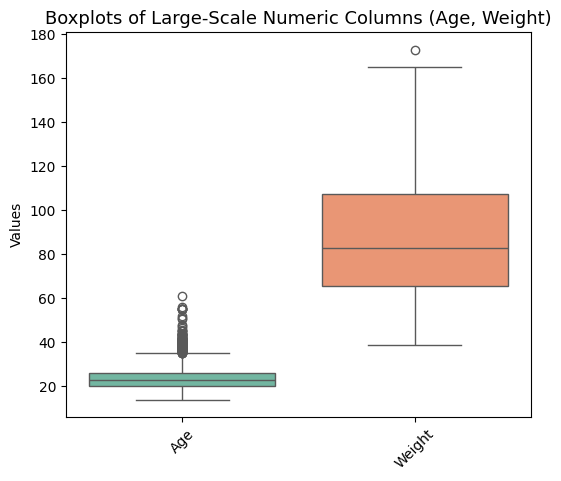

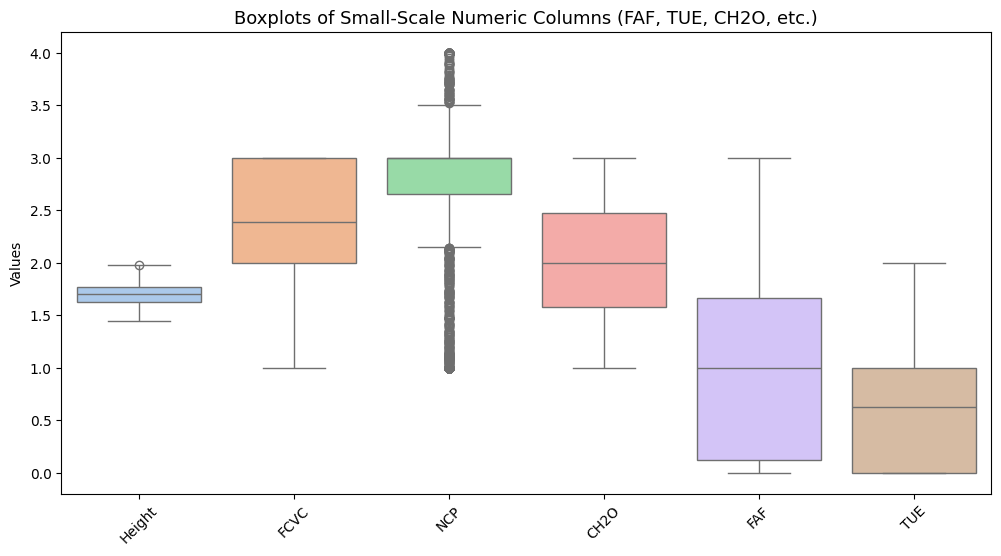

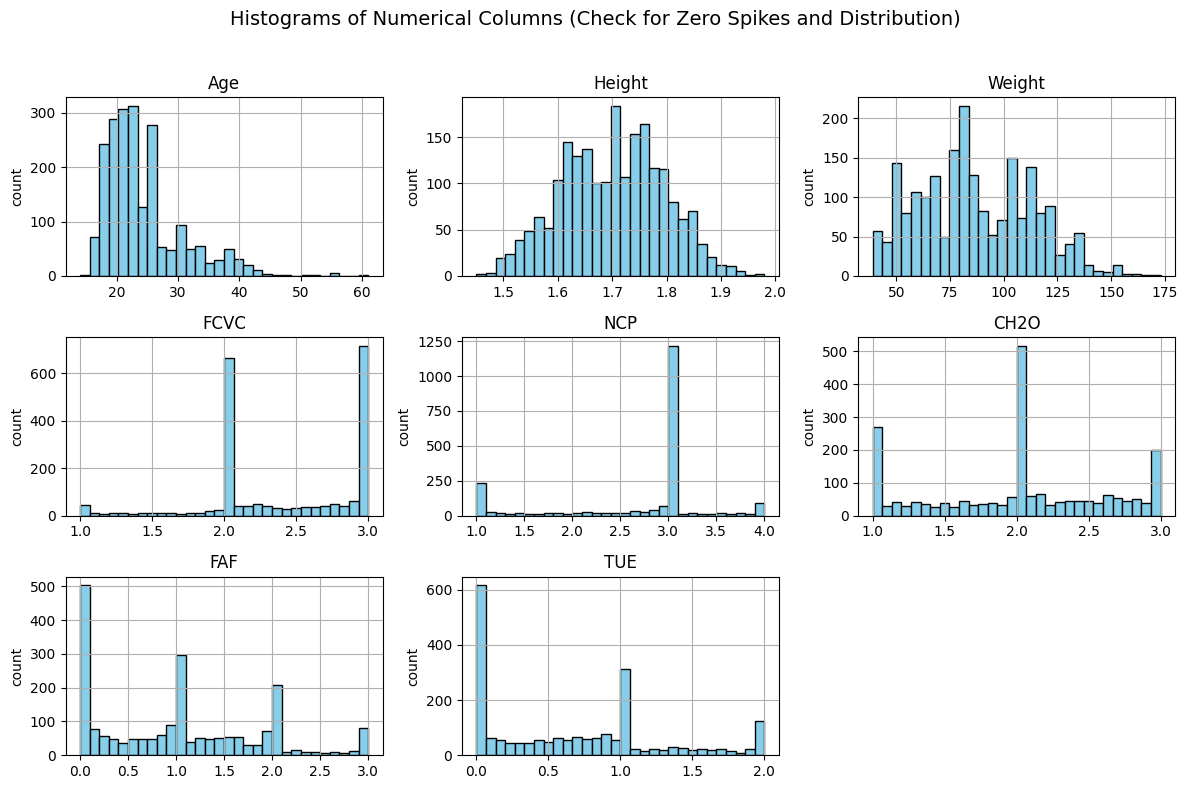

In [3]:
#  Two Boxplots for Numeric Columns (Large vs Small) + Zero Count + Histogram View

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a copy and select numeric columns
df_numeric = df.copy()
numeric_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Count zeros in each numeric column
zero_counts = (df_numeric[numeric_cols] == 0).sum()

# Step 3: Display columns that contain zeros
print("Columns containing zero values:\n")
print(zero_counts[zero_counts > 0].sort_values(ascending=False))

# Step 4: Optional message if no zeros found
if (zero_counts == 0).all():
    print("\n No zero values found in any numeric column.")

# Step 5: Split columns into large-scale and small-scale groups
large_cols = ['Age', 'Weight']  # Big numeric values
small_cols = [col for col in numeric_cols if col not in large_cols]

# ---  Boxplot for Large-Scale Numeric Columns ---
plt.figure(figsize=(6,5))
sns.boxplot(data=df_numeric[large_cols], palette='Set2')
plt.title('Boxplots of Large-Scale Numeric Columns (Age, Weight)', fontsize=13)
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# ---  Boxplot for Small-Scale Numeric Columns ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df_numeric[small_cols], palette='pastel')
plt.title('Boxplots of Small-Scale Numeric Columns (FAF, TUE, CH2O, etc.)', fontsize=13)
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# ---  Histogram view to see zero spikes and distributions ---
fig = df_numeric[numeric_cols].hist(
    figsize=(12, 8),
    bins=30,
    color='skyblue',
    edgecolor='black'
)

# Add y-axis label "Count" to every histogram
for ax in fig.flatten():
    ax.set_ylabel("count")

plt.suptitle(
    'Histograms of Numerical Columns (Check for Zero Spikes and Distribution)',
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # prevent title overlap
plt.show()



In [4]:
top5_weights = df['Weight'].nlargest(15)
print(top5_weights)

344     173.000000
502     165.057269
1898    160.935351
1910    160.639405
1838    155.872093
1998    155.242672
1897    154.618446
1997    153.959945
2029    153.149491
1826    152.720545
1926    152.567671
2030    152.473675
1949    152.435630
1909    152.394739
1973    152.371911
Name: Weight, dtype: float64


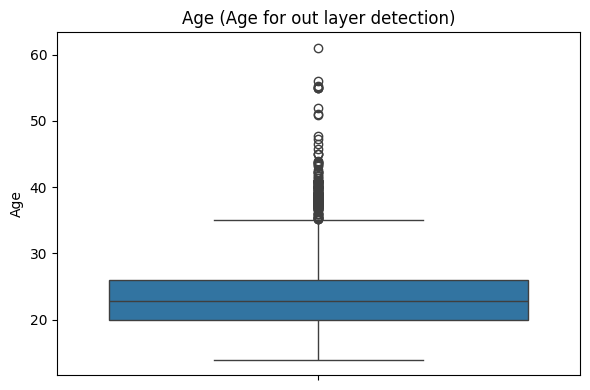

In [5]:
# ==========================================================
# Box Plot of Age for out layer detection
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Age'])
plt.title("Age (Age for out layer detection)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


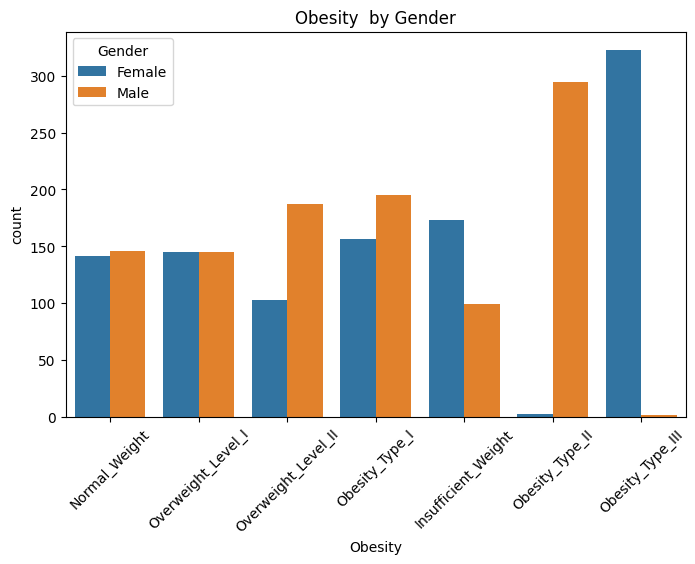

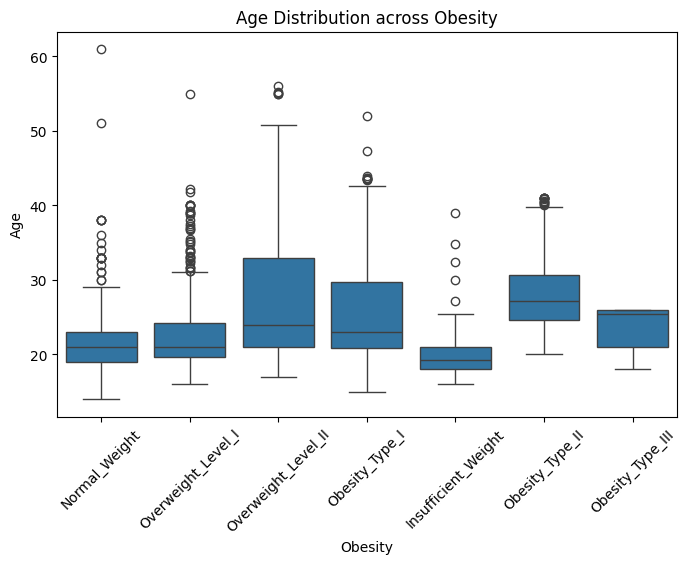

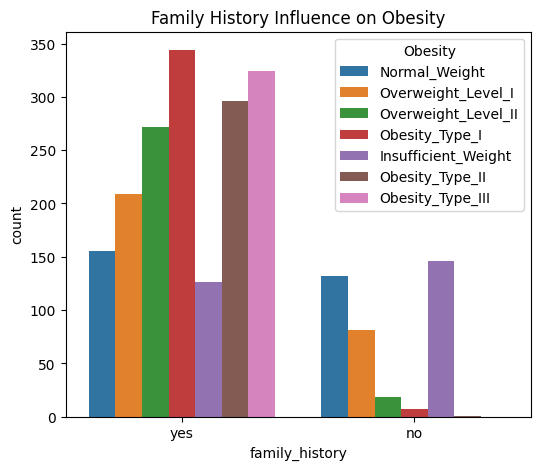

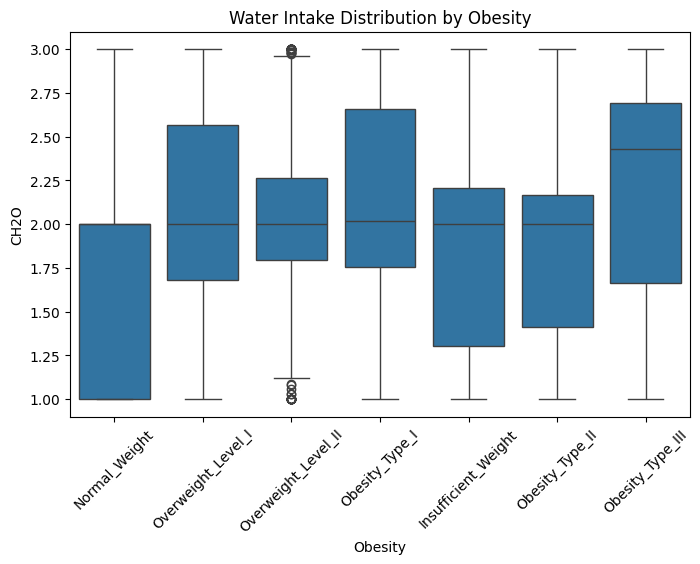

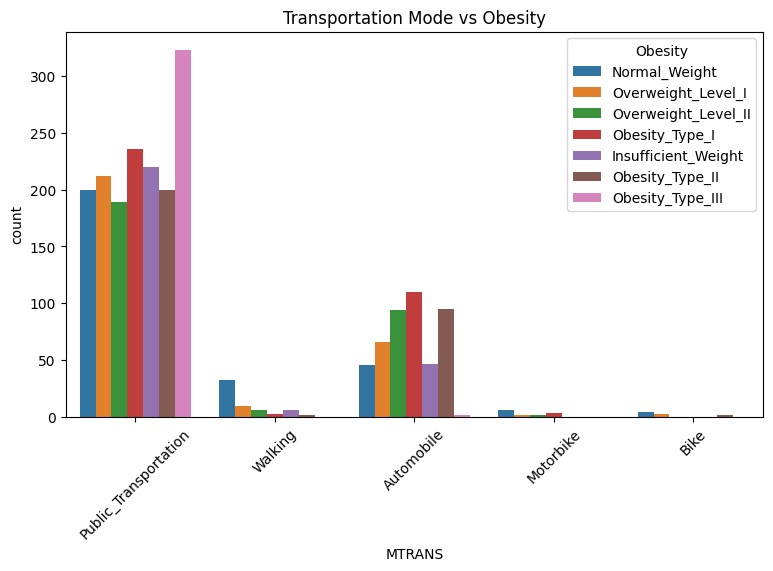

In [6]:
#  Gender vs Obesity Level
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Obesity', hue='Gender')
plt.title("Obesity  by Gender")
plt.xticks(rotation=45)
plt.show()

# Age Distribution by Obesity Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Obesity', y='Age')
plt.title("Age Distribution across Obesity")
plt.xticks(rotation=45)
plt.show()

#  Family History vs Obesity Level
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='family_history', hue='Obesity')
plt.title("Family History Influence on Obesity")
plt.show()

#  Water Intake vs Obesity Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Obesity', y='CH2O')
plt.title("Water Intake Distribution by Obesity")
plt.xticks(rotation=45)
plt.show()

# Transportation Mode vs Obesity Level
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='MTRANS', hue='Obesity')
plt.title("Transportation Mode vs Obesity")
plt.xticks(rotation=45)
plt.show()


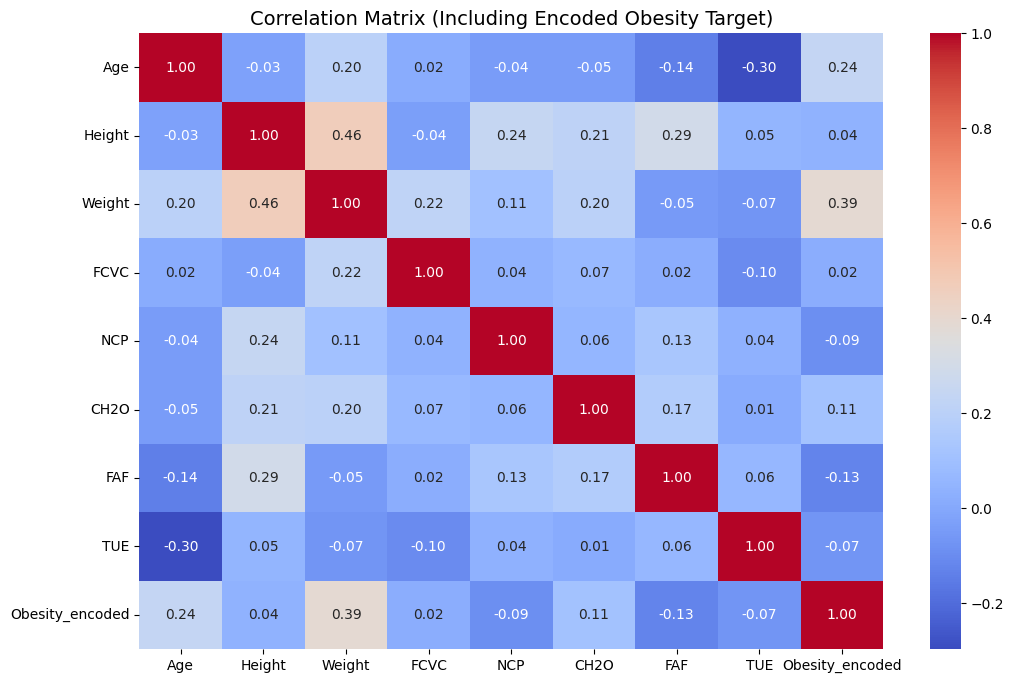

Top correlated features with Obesity (encoded):

Obesity_encoded    1.00
Weight             0.39
Age                0.24
CH2O               0.11
Height             0.04
FCVC               0.02
TUE               -0.07
NCP               -0.09
FAF               -0.13
Name: Obesity_encoded, dtype: float64
Top correlated features with Obesity (encoded):



,Correlation
Obesity_encoded,1.000000
Weight,0.390000
Age,0.240000
CH2O,0.110000
Height,0.040000
FCVC,0.020000
TUE,-0.070000
NCP,-0.090000
FAF,-0.130000


In [7]:
# ===========================================================
# Encode Categorical Target + Correlation Matrix
# ===========================================================

# Encode the target column 'Obesity'
df['Obesity_encoded'] = df['Obesity'].astype('category').cat.codes

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the encoded target column for correlation
numeric_df['Obesity_encoded'] = df['Obesity_encoded']

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# 5Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Including Encoded Obesity Target)", fontsize=14)
plt.show()

# Identify top correlated features with target
target_col = 'Obesity_encoded'
target_corr = corr_matrix[target_col].sort_values(ascending=False).round(2)

print("Top correlated features with Obesity (encoded):\n")
print(target_corr.head(10))
print("Top correlated features with Obesity (encoded):\n")
display(target_corr.head(10).to_frame(name='Correlation').style.background_gradient(cmap='coolwarm'))



In [8]:
# ============================================================
# LOGISTIC REGRESSION - For Obesity Classification
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ----------------------------
#  Prepare data
# ----------------------------
df=df.drop_duplicates()
target = 'Obesity'
X = df.drop(columns=[target])
y = df[target]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split[]
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
#  Preprocessing
# ----------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ----------------------------
#  Logistic Regression pipeline
# ----------------------------
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')) #classification model (clf),Limited-memory BFGS, a popular optimization method
])

# ----------------------------
#  Train and evaluate
# ----------------------------
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("=== Logistic Regression (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")# 4 decimal values ex: 85.9876
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


=== Logistic Regression (Obesity Classification) ===
Accuracy : 0.8971
Precision: 0.8950
Recall   : 0.8971
F1 Score : 0.8954

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        53
      Normal_Weight       0.84      0.82      0.83        57
     Obesity_Type_I       0.92      0.93      0.92        70
    Obesity_Type_II       0.94      1.00      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.80      0.80      0.80        55
Overweight_Level_II       0.82      0.72      0.77        58

           accuracy                           0.90       418
          macro avg       0.89      0.89      0.89       418
       weighted avg       0.89      0.90      0.90       418



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
# ============================================================
# GRADIENT BOOSTING CLASSIFIER - Obesity Dataset
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ------------------------------------------------------------
#  Load and prepare dataset
# ------------------------------------------------------------
# df = pd.read_csv("/content/drive/MyDrive/Obesity_cleaned.csv")

target = 'Obesity'
X = df.drop(columns=[target])
df=df.drop_duplicates()
y = df[target]

# Encode categorical target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------------------------------------
#  Preprocessing (Handle categorical + numeric)
# ------------------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ------------------------------------------------------------
#  Build Pipeline with Gradient Boosting
# ------------------------------------------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# ------------------------------------------------------------
#  Train Model
# ------------------------------------------------------------
gb_pipeline.fit(X_train, y_train)

# ------------------------------------------------------------
#  Predictions & Evaluation
# ------------------------------------------------------------
y_pred = gb_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("=== Gradient Boosting Classifier (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Gradient Boosting Classifier (Obesity Classification) ===
Accuracy : 0.9809
Precision: 0.9810
Recall   : 0.9809
F1 Score : 0.9809

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.96      0.95      0.96        57
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.95      0.94        55
Overweight_Level_II       0.98      1.00      0.99        58

           accuracy                           0.98       418
          macro avg       0.98      0.98      0.98       418
       weighted avg       0.98      0.98      0.98       418


Confusion Matrix:
[[53  0  0  0  0  0  0]
 [ 0 54  0  0  0  3  0]
 [ 0  0 69  0  0  1  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 52  1]
 [ 0 

In [11]:
# ============================================================
# GRADIENT BOOSTING CLASSIFIER with RandomizedSearchCV - Obesity Dataset
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from scipy.stats import uniform, randint

# ------------------------------------------------------------
# 1. Load and prepare dataset
# ------------------------------------------------------------
# df = pd.read_csv("/content/drive/MyDrive/Obesity_cleaned.csv")

target = 'Obesity'
df = df.drop_duplicates()
X = df.drop(columns=[target])
y = df[target]

# Encode categorical target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------------------------------------
# 2. Preprocessing (Handle categorical + numeric)
# ------------------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ------------------------------------------------------------
# 3. Gradient Boosting Pipeline
# ------------------------------------------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# ------------------------------------------------------------
# 4. Define Hyperparameter Search Space
# ------------------------------------------------------------
param_dist = {
    'gb__n_estimators': randint(100, 500),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth': randint(2, 6),
    'gb__min_samples_split': randint(2, 10),
    'gb__min_samples_leaf': randint(1, 6),
    'gb__subsample': uniform(0.7, 0.3)
}

# ------------------------------------------------------------
# 5. RandomizedSearchCV - 5-fold cross validation
# ------------------------------------------------------------
random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ------------------------------------------------------------
# 6. Fit the model
# ------------------------------------------------------------
random_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters Found ===")
print(random_search.best_params_)

# ------------------------------------------------------------
# 7. Evaluate on Test Set
# ------------------------------------------------------------
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Gradient Boosting Classifier (Best Tuned Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Best Hyperparameters Found ===
{'gb__learning_rate': np.float64(0.1929989973347863), 'gb__max_depth': 5, 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 7, 'gb__n_estimators': 180, 'gb__subsample': np.float64(0.777633994480005)}

=== Gradient Boosting Classifier (Best Tuned Model) ===
Accuracy : 0.9785
Precision: 0.9793
Recall   : 0.9785
F1 Score : 0.9786

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.98      0.95      0.96        57
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.92      0.98      0.95        55
Overweight_Level_II       0.98      0.98      0.98        58

           accuracy                           0.98       

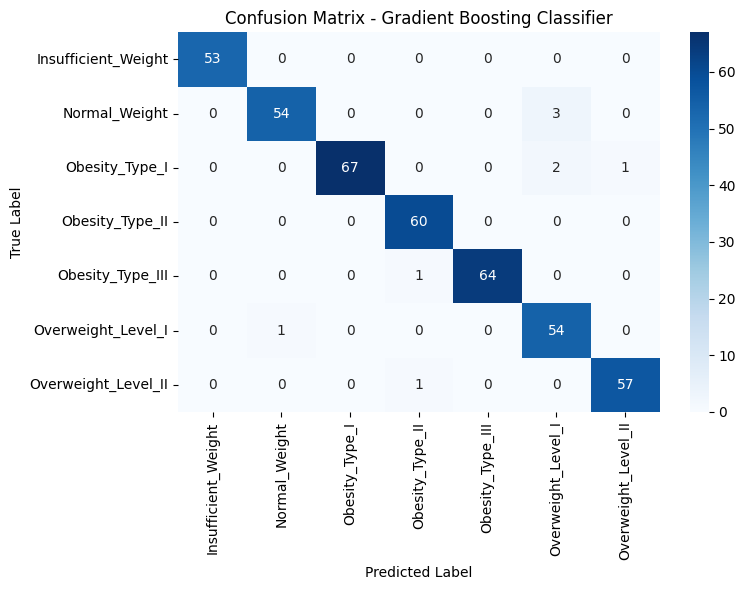

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# ------------------------------------------------------------
# 8. Confusion Matrix Visualization (Colored Heatmap)
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_  # original class names (e.g., Normal, Overweight, etc.)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [13]:
# ============================================================
# LOGISTIC REGRESSION with Hyperparameter Tuning - Obesity Classification
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ----------------------------
#  Prepare data
# ----------------------------
df = df.drop_duplicates()
target = 'Obesity'
X = df.drop(columns=[target])
y = df[target]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
#  Preprocessing
# ----------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ----------------------------
#  Base Logistic Regression model
# ----------------------------
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logreg)
])

# ----------------------------
#  Hyperparameter tuning (GridSearchCV)
# ----------------------------
#'l1' → Lasso (helps with feature selection), 'l2' → Ridge (shrinks coefficients, reduces overfitting)
param_grid = {
    'clf__penalty': ['l2', 'l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__solver': ['lbfgs', 'saga'],
    'clf__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=pipeline,        # our pipeline (preprocessing + logistic regression)
    param_grid=param_grid,     # dictionary of hyperparameters to try
    cv=5,                      # 5-fold cross-validation (split training data into 5 parts)
    scoring='f1_weighted',     # evaluation metric (balances precision & recall for imbalance)
    n_jobs=-1,                 # use all CPU cores for faster processing
    verbose=2                  # show detailed progress while running
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# ----------------------------
#  Best model evaluation
# ----------------------------
print("\nBest Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Logistic Regression (Best Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Best Parameters: {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'saga'}

=== Logistic Regression (Best Model) ===
Accuracy : 0.9522
Precision: 0.9523
Recall   : 0.9522
F1 Score : 0.9520

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        53
      Normal_Weight       0.98      0.95      0.96        57
     Obesity_Type_I       0.94      0.94      0.94        70
    Obesity_Type_II       0.94      0.98      0.96        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.91      0.92        55
Overweight_Level_II       0.91      0.90      0.90        58

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.95      0.95      0.95       418



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


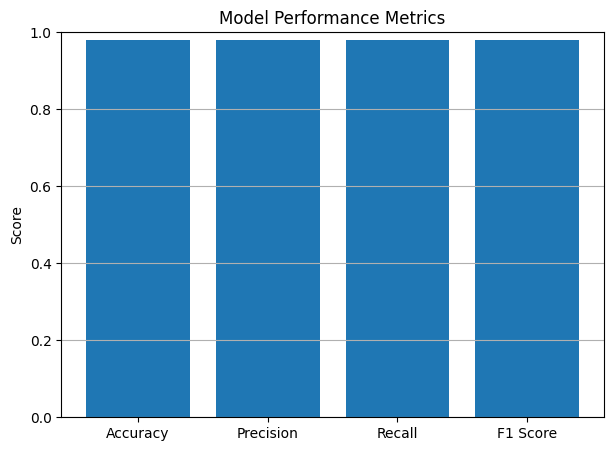

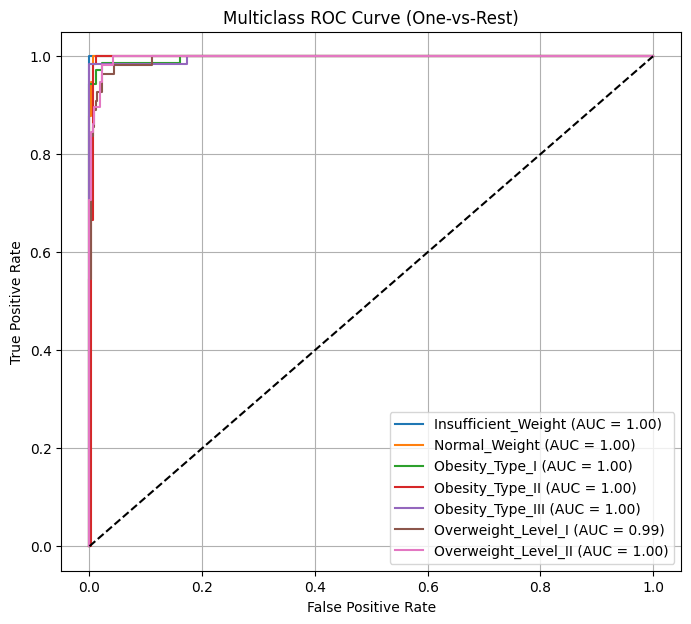

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# ======================================================
#  BAR PLOT – Accuracy, Precision, Recall, F1
# ======================================================

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
plt.bar(metrics, values)
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.grid(axis='y')
plt.show()

# ======================================================
#  ROC CURVE (Multiclass – One-vs-Rest)
# ======================================================

# Binarize y-test for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from model
y_prob = best_model.predict_proba(X_test)

plt.figure(figsize=(8,7))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{le.classes_[i]} (AUC = {roc_auc:.2f})")

# Random classifier line
plt.plot([0,1], [0,1], 'k--')

plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


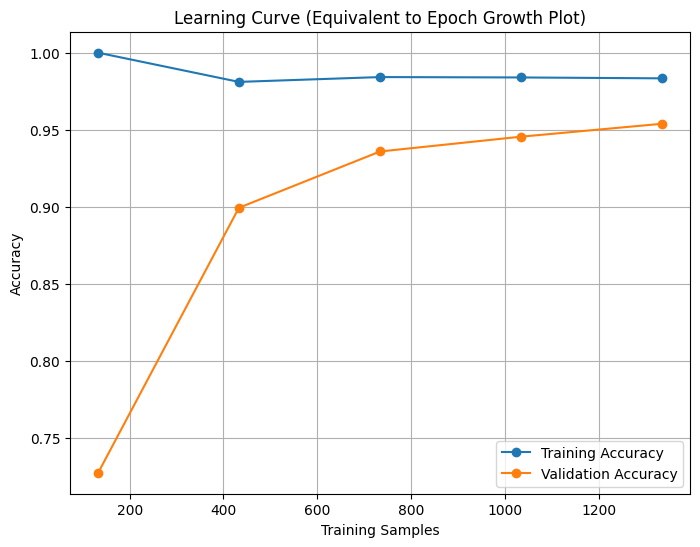

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, marker='o', label="Training Accuracy")
plt.plot(train_sizes, test_mean, marker='o', label="Validation Accuracy")

plt.title("Learning Curve (Equivalent to Epoch Growth Plot)")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


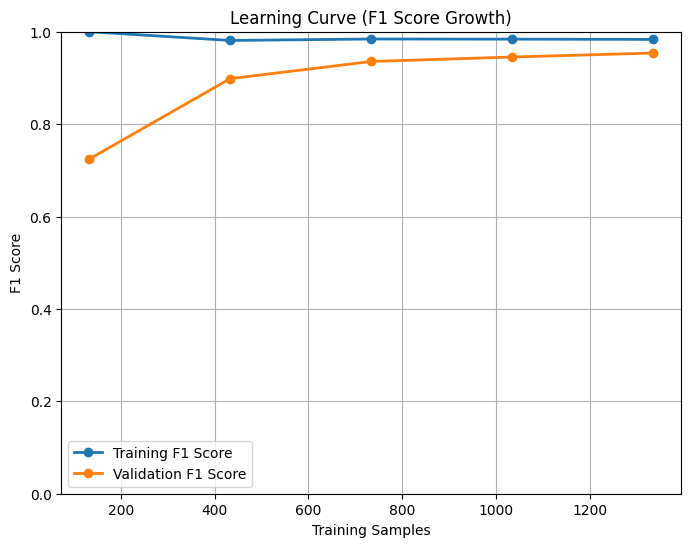

In [21]:
from sklearn.model_selection import learning_curve


# -------------------------------
# F1 SCORE LEARNING CURVE
# -------------------------------

train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, marker='o', linewidth=2, label="Training F1 Score")
plt.plot(train_sizes, test_mean, marker='o', linewidth=2, label="Validation F1 Score")

plt.title("Learning Curve (F1 Score Growth)")
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


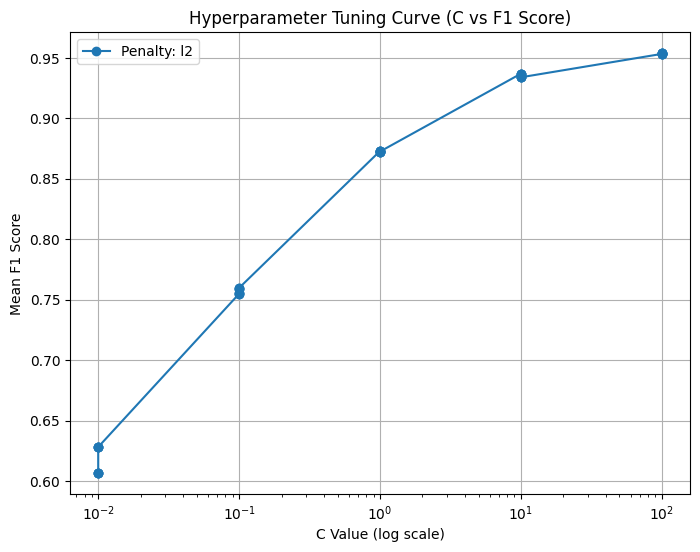

In [22]:
# -------------------------------
# HYPERPARAMETER TUNING CURVE (C vs F1)
# -------------------------------

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8,6))

for penalty in ['l2']:
    subset = results[results['param_clf__penalty'] == penalty]
    plt.plot(
        subset['param_clf__C'],
        subset['mean_test_score'],
        marker='o',
        label=f"Penalty: {penalty}"
    )

plt.xscale('log')
plt.xlabel("C Value (log scale)")
plt.ylabel("Mean F1 Score")
plt.title("Hyperparameter Tuning Curve (C vs F1 Score)")
plt.grid(True)
plt.legend()
plt.show()


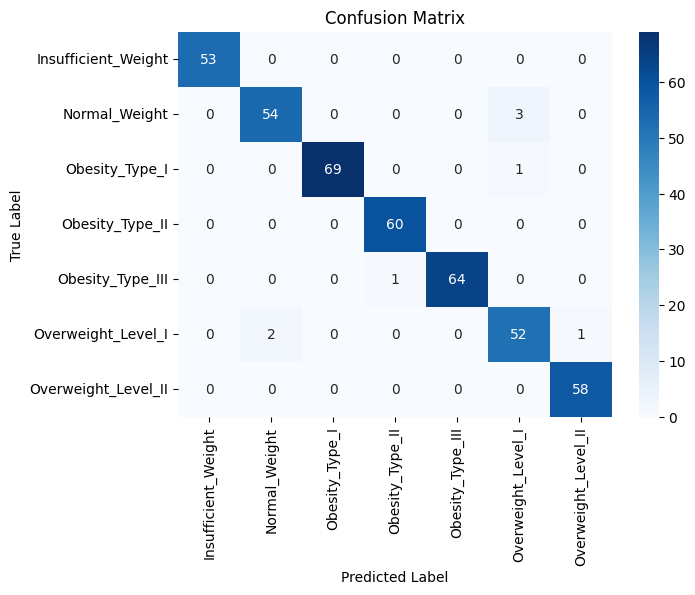

In [23]:
# -------------------------------
# CONFUSION MATRIX HEATMAP
# -------------------------------

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


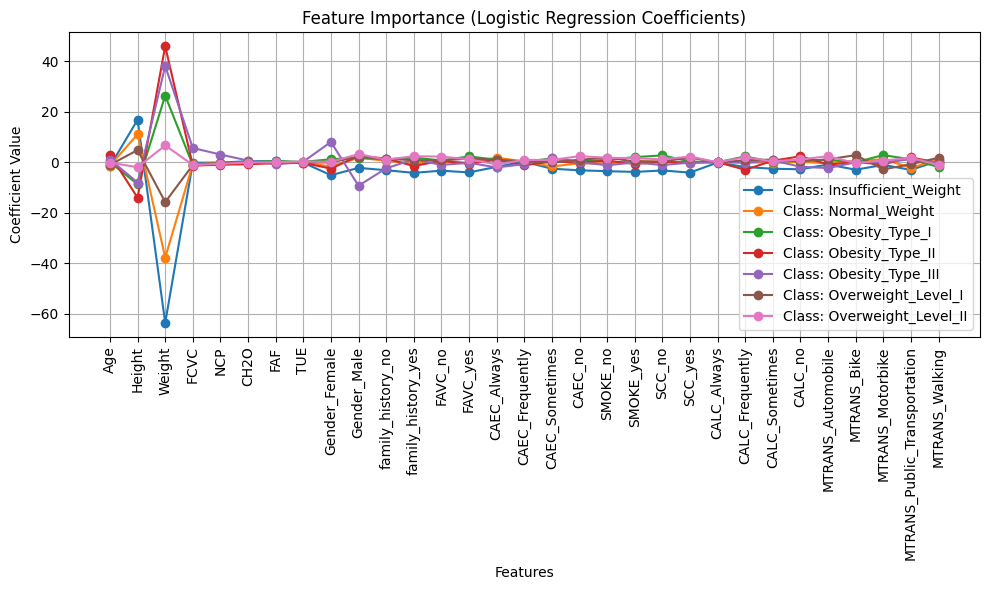

In [30]:
# -------------------------------
# FEATURE IMPORTANCE (COEFFICIENTS)
# -------------------------------

# Extract the classifier inside the pipeline
clf = best_model.named_steps['clf']

# Extract all feature names from preprocessor
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
num_cols = list(best_model.named_steps['preprocessor'].transformers_[0][2])
cat_cols_expanded = list(ohe.get_feature_names_out())

feature_names = num_cols + cat_cols_expanded

# Logistic Regression coefficients (for multiclass: one row per class)
# If weight increases  chance of Insufficient Weight goes down,
#If weight increases → chance of Obesity_Type increases up
coef = clf.coef_

plt.figure(figsize=(10,6))

for i, class_name in enumerate(le.classes_):
    plt.plot(feature_names, coef[i], marker='o', label=f"Class: {class_name}")

plt.xticks(rotation=90)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


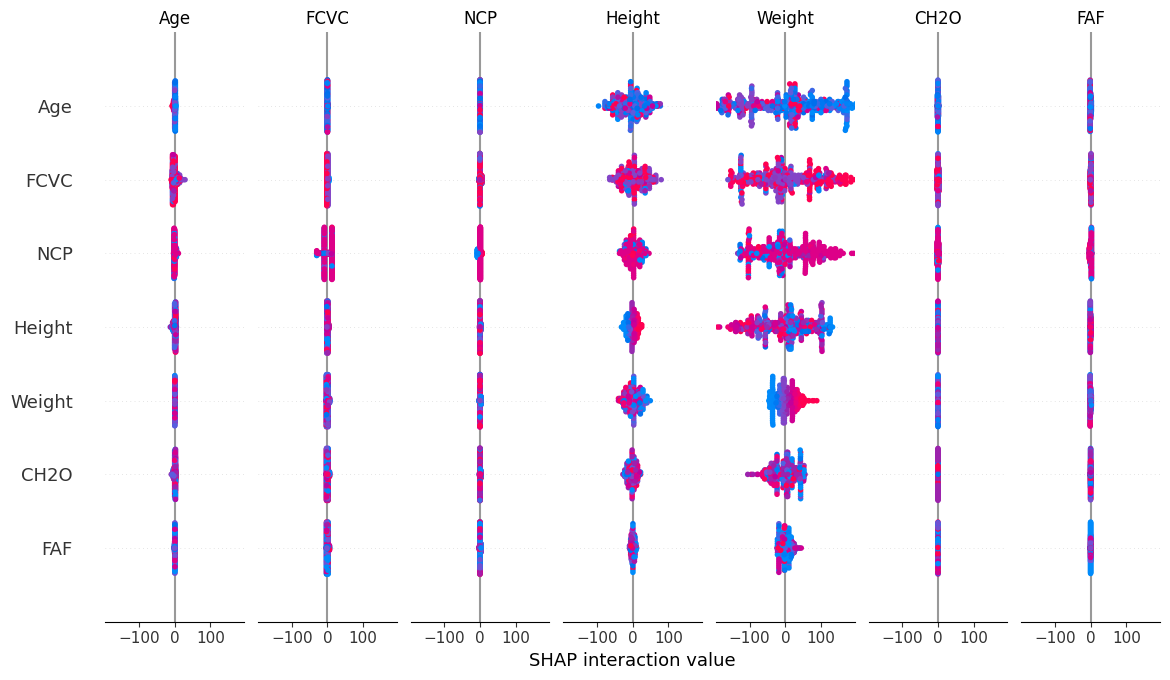

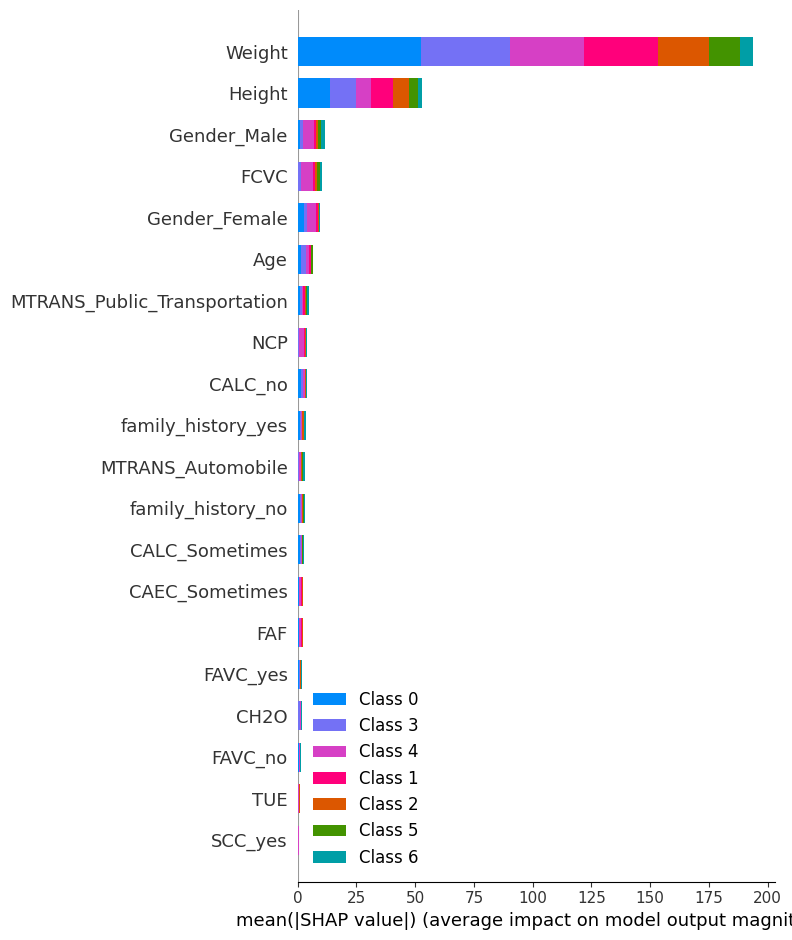

In [31]:
import shap

# -------------------------------
# 1. Extract preprocessor & classifier
# -------------------------------
preprocessor = best_model.named_steps['preprocessor']
clf = best_model.named_steps['clf']

# -------------------------------
# 2. Transform X_test using the preprocessor
# -------------------------------
X_test_transformed = preprocessor.transform(X_test)

# Get feature names (numerical + one-hot encoded)
ohe = preprocessor.named_transformers_['cat']
num_cols = list(preprocessor.transformers_[0][2])
cat_cols_expanded = list(ohe.get_feature_names_out())
feature_names = num_cols + cat_cols_expanded

# -------------------------------
# 3. Create SHAP explainer
# -------------------------------
explainer = shap.LinearExplainer(clf, X_test_transformed, feature_names=feature_names)

# -------------------------------
# 4. Compute SHAP values
# -------------------------------
shap_values = explainer.shap_values(X_test_transformed)

# -------------------------------
# 5. Summary Plot (Beeswarm)
# -------------------------------
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar")


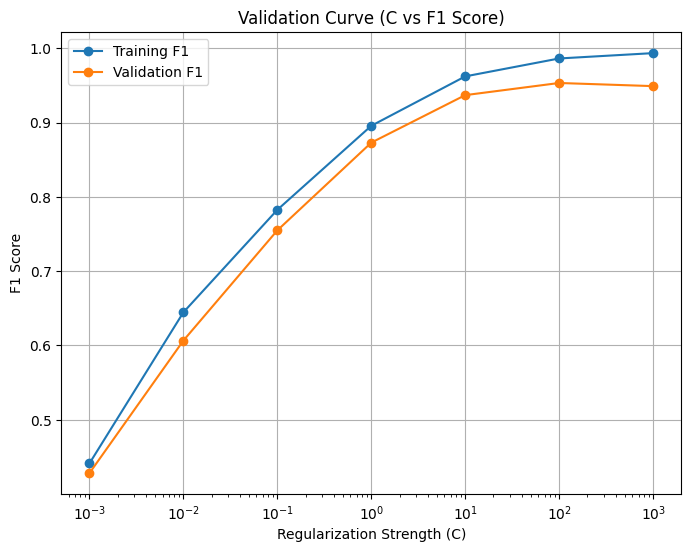

In [26]:
from sklearn.model_selection import validation_curve
import numpy as np

# -------------------------------
# VALIDATION CURVE for C
# -------------------------------

param_range = np.logspace(-3, 3, 7) #the x-axis begins at 10⁻³ (0.001).   [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_scores, test_scores = validation_curve(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    param_name="clf__C",
    param_range=param_range,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.semilogx(param_range, train_mean, marker='o', label="Training F1")
plt.semilogx(param_range, test_mean, marker='o', label="Validation F1")

plt.title("Validation Curve (C vs F1 Score)")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.legend()
plt.show()


In [32]:
# ============================================================
# HYBRID LOGISTIC REGRESSION with Hyperparameter Tuning
# Obesity Classification Project
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ----------------------------
#  Prepare data
# ----------------------------
df = df.drop_duplicates()  # remove duplicate rows
target = 'Obesity'
X = df.drop(columns=[target])
y = df[target]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
#  Preprocessing
# ----------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),   # scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # encode categorical
    ]
)

# ----------------------------
#  Base Logistic Regression model
# ----------------------------
logreg = LogisticRegression(max_iter=1000)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logreg)
])

# ----------------------------
#  Hybrid Hyperparameter Tuning (GridSearchCV)
# ----------------------------
# Hybrid = testing multiple solvers + multiple penalty types safely
param_grid = [
    {
        # Group 1: L2 regularization (Ridge)
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'clf__class_weight': [None, 'balanced']
    },
    {
        # Group 2: L1 regularization (Lasso)
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__solver': ['liblinear', 'saga'],
        'clf__class_weight': [None, 'balanced']
    },
    {
        # Group 3: ElasticNet (L1 + L2 mix)
        'clf__penalty': ['elasticnet'],
        'clf__C': [0.1, 1, 10],
        'clf__solver': ['saga'],
        'clf__l1_ratio': [0.2, 0.5, 0.8],  # ratio between L1 and L2
        'clf__class_weight': [None, 'balanced']
    }
]

# Grid search setup
grid_search = GridSearchCV(
    estimator=pipeline,        # pipeline (preprocessing + classifier)
    param_grid=param_grid,     # hybrid hyperparameter groups
    cv=5,                      # 5-fold cross-validation
    scoring='f1_weighted',     # F1 (weighted) metric
    n_jobs=-1,                 # use all CPU cores
    verbose=2                  # show progress
)

# ----------------------------
#  Train the hybrid model
# ----------------------------
grid_search.fit(X_train, y_train)

# ----------------------------
#  Evaluate best model
# ----------------------------
print("\nBest Parameters Found:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Hybrid Logistic Regression (Best Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Fitting 5 folds for each of 74 candidates, totalling 370 fits

Best Parameters Found: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'saga'}

=== Hybrid Logistic Regression (Best Model) ===
Accuracy : 0.9641
Precision: 0.9651
Recall   : 0.9641
F1 Score : 0.9642

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        53
      Normal_Weight       1.00      0.95      0.97        57
     Obesity_Type_I       0.99      0.94      0.96        70
    Obesity_Type_II       0.95      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.93      0.94        55
Overweight_Level_II       0.90      0.95      0.92        58

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.97      0.96      0.96       418



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 74 candidates, totalling 370 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


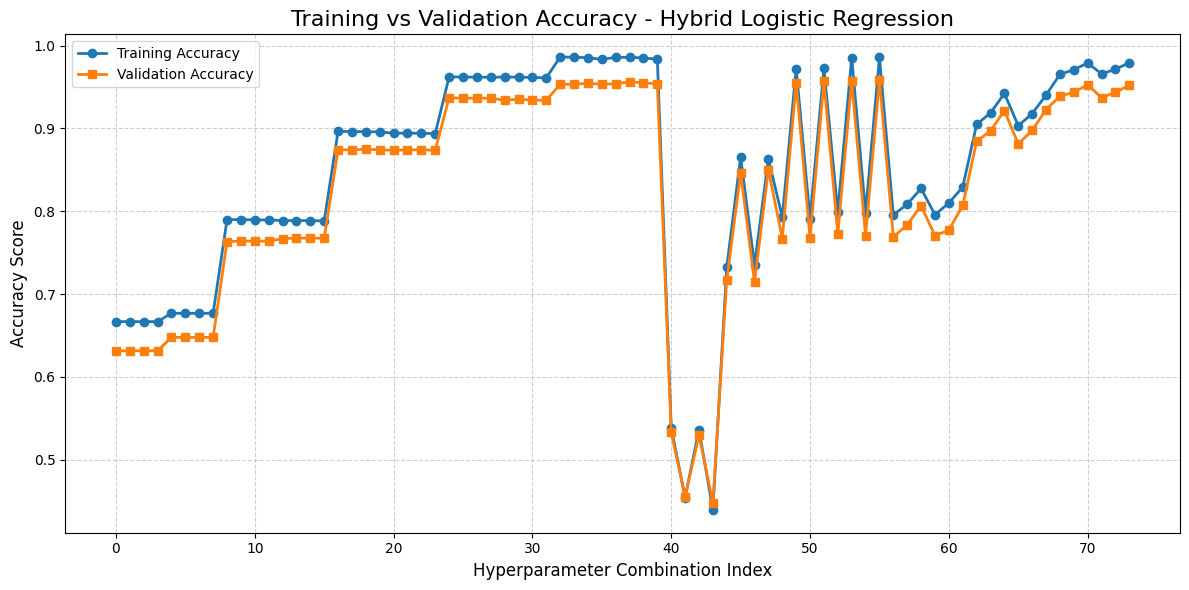


Best Parameters Found: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'saga'}

=== Hybrid Logistic Regression (Best Model) ===
Accuracy : 0.9641
Precision: 0.9651
Recall   : 0.9641
F1 Score : 0.9642

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        53
      Normal_Weight       1.00      0.95      0.97        57
     Obesity_Type_I       0.99      0.94      0.96        70
    Obesity_Type_II       0.95      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.93      0.94        55
Overweight_Level_II       0.90      0.95      0.92        58

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.97      0.96      0.96       418



In [33]:
# ============================================================
# HYBRID LOGISTIC REGRESSION with Hyperparameter Tuning
# Obesity Classification Project
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt

# ----------------------------
#  Prepare data
# ----------------------------
df = df.drop_duplicates()  # remove duplicate rows
target = 'Obesity'
X = df.drop(columns=[target])
y = df[target]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
#  Preprocessing
# ----------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),   # scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # encode categorical
    ]
)

# ----------------------------
#  Logistic Regression Setup
# ----------------------------
logreg = LogisticRegression(max_iter=1000)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logreg)
])

# ----------------------------
#  Hybrid Hyperparameter Tuning
# ----------------------------
param_grid = [
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'clf__class_weight': [None, 'balanced']
    },
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__solver': ['liblinear', 'saga'],
        'clf__class_weight': [None, 'balanced']
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [0.1, 1, 10],
        'clf__solver': ['saga'],
        'clf__l1_ratio': [0.2, 0.5, 0.8],
        'clf__class_weight': [None, 'balanced']
    }
]

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',     # use accuracy for plotting
    n_jobs=-1,
    verbose=2,
    return_train_score=True  # IMPORTANT for training accuracy
)

# ----------------------------
#  Train the model
# ----------------------------
grid_search.fit(X_train, y_train)

# ----------------------------
#  Training & Validation Accuracy Plot
# ----------------------------
train_scores = grid_search.cv_results_['mean_train_score']
val_scores   = grid_search.cv_results_['mean_test_score']

x = range(len(train_scores))

plt.figure(figsize=(12, 6))
plt.plot(x, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(x, val_scores, marker='s', label='Validation Accuracy', linewidth=2)

plt.title("Training vs Validation Accuracy - Hybrid Logistic Regression", fontsize=16)
plt.xlabel("Hyperparameter Combination Index", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ----------------------------
#  Evaluate best model
# ----------------------------
print("\nBest Parameters Found:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Hybrid Logistic Regression (Best Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


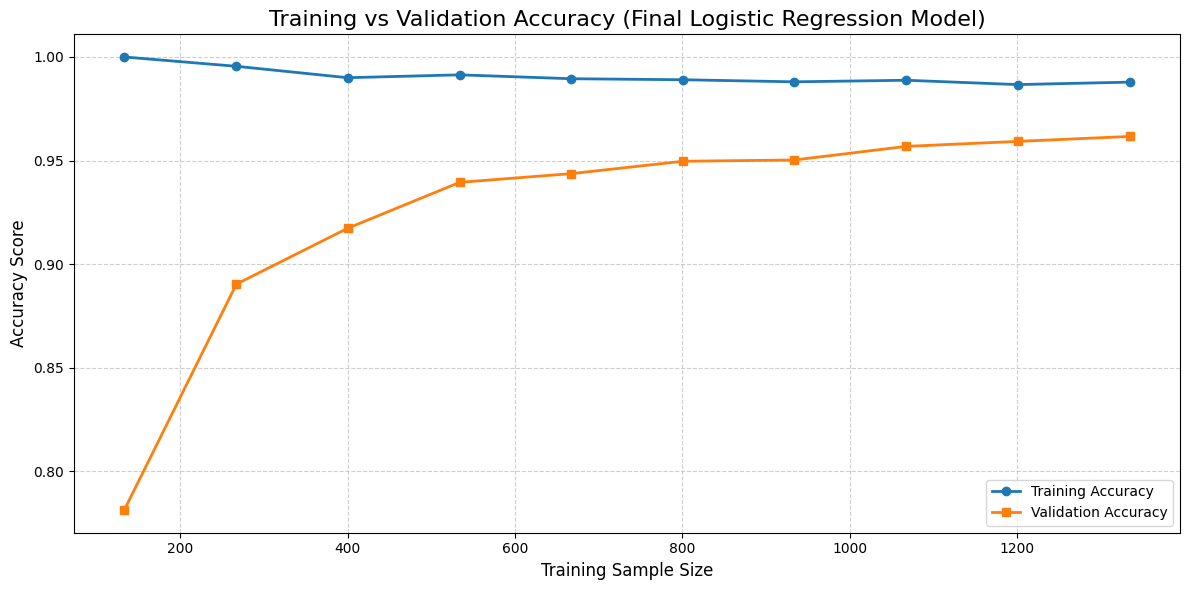

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



=== Final Logistic Regression (Best Parameters Applied) ===
Accuracy : 0.9689
Precision: 0.9696
Recall   : 0.9689
F1 Score : 0.9689

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        53
      Normal_Weight       1.00      0.96      0.98        57
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       0.95      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.93      0.94        55
Overweight_Level_II       0.92      0.95      0.93        58

           accuracy                           0.97       418
          macro avg       0.97      0.97      0.97       418
       weighted avg       0.97      0.97      0.97       418



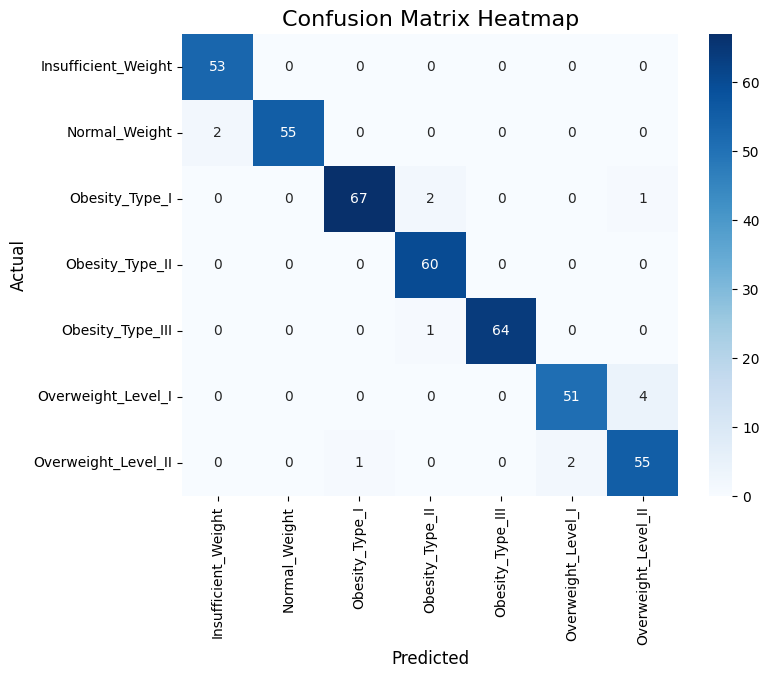

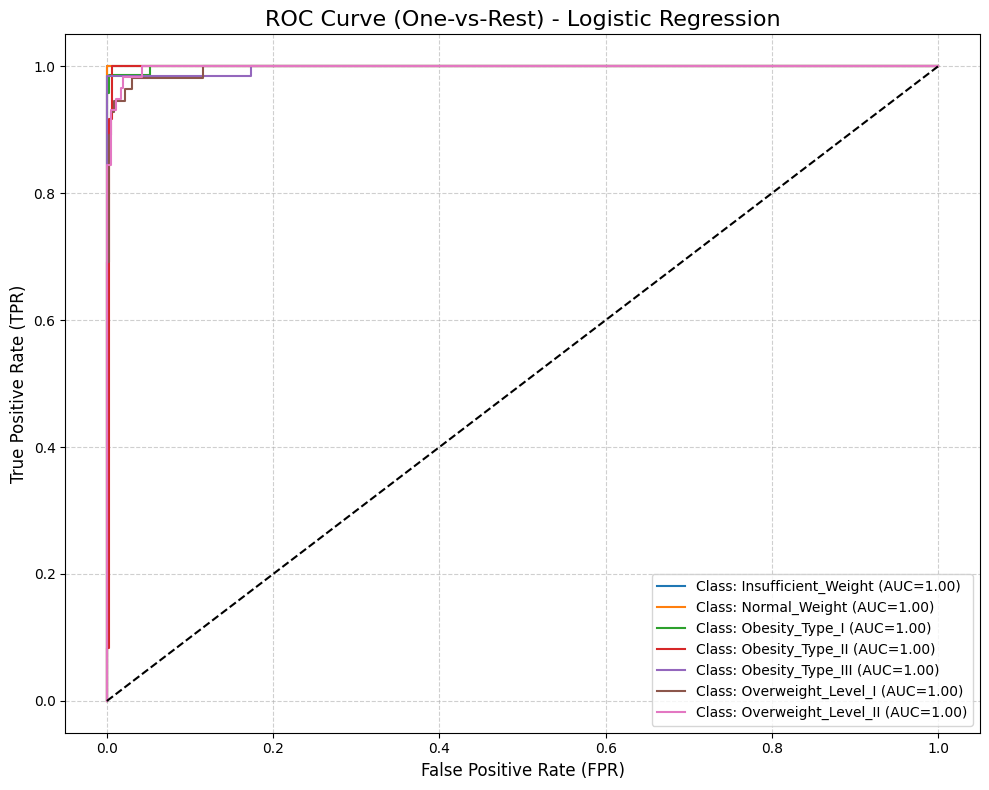

In [34]:
# ============================================================
# FINAL LOGISTIC REGRESSION MODEL (Using Best Parameters Only)
# Training vs Validation Accuracy Plot
# Confusion Matrix Heatmap
# ROC Curve (One-vs-Rest)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)

# ----------------------------
#  Prepare data
# ----------------------------
df = df.drop_duplicates()
target = 'Obesity'
X = df.drop(columns=[target])
y = df[target]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
#  Preprocessing Pipeline
# ----------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ----------------------------
#  FINAL Logistic Regression Model (Your Best Parameters)
# ----------------------------
model = LogisticRegression(
    C=10,
    penalty='l1',
    solver='saga',
    class_weight='balanced',
    max_iter=2000
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', model)
])

# ----------------------------
#  LEARNING CURVE (Train vs Validation Accuracy Plot)
# ----------------------------
train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

mean_train = train_scores.mean(axis=1)
mean_val = val_scores.mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, mean_train, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(train_sizes, mean_val, marker='s', label='Validation Accuracy', linewidth=2)

plt.title("Training vs Validation Accuracy (Final Logistic Regression Model)", fontsize=16)
plt.xlabel("Training Sample Size", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ----------------------------
#  Train final model fully
# ----------------------------
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# ----------------------------
#  Evaluate final model
# ----------------------------
print("\n=== Final Logistic Regression (Best Parameters Applied) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ============================================================
#  CONFUSION MATRIX HEATMAP
# ============================================================
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# ============================================================
#  ROC CURVE (One-vs-Rest)
# ============================================================
# Binarize true labels
num_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(num_classes))

# Predict probabilities
y_proba = pipeline.predict_proba(X_test)

plt.figure(figsize=(10, 8))

# For each class
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class: {le.classes_[i]} (AUC={auc_score:.2f})")

# Baseline (random)
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve (One-vs-Rest) - Logistic Regression", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
